# 여행자 보험데이터 
## Claim(보험금 청구) 여부 분류

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')

In [2]:
travel_insurance = pd.read_csv("https://raw.githubusercontent.com/fintech-data/Revolution/main/data/travel%20insurance.csv")

In [3]:
travel_insurance.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
travel_insurance.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name',
       'Net Sales':'Net_Sales', 'Commision (in value)':'Commision_in_value'
       },inplace=True)


- Agency: str, 보험 판매점
- Agency Type: str, 판매점 형태
- Distribution Channel: str, 판매 채널
- Product Name : str,  판매 상품 종류
- Duration: str, 보험기간
- Destination: str,  여행국가
- Net Sales: int, 순마진
- Commision (in value): float, 수수료
- Gender: str, 성별
- Age: int, 나이
- Claim : 보험금 청구


# 1. 데이터 전처리

In [5]:
travel_insurance.shape

(63326, 11)

In [6]:
travel_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency_Type           63326 non-null  object 
 2   Distribution_Channel  63326 non-null  object 
 3   Product_Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net_Sales             63326 non-null  float64
 8   Commision_in_value    63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


## 1-1. 결측치 제거

In [7]:
travel_insurance.isnull().sum() #Gender에 결측치가 매우 많음 

Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product_Name                0
Claim                       0
Duration                    0
Destination                 0
Net_Sales                   0
Commision_in_value          0
Gender                  45107
Age                         0
dtype: int64

In [8]:
travel_insurance['Gender'].unique() # 성별을 모르는 경우가 매우 많다. 

array(['F', nan, 'M'], dtype=object)

In [9]:
# History가 없는 경우 존재 -> NaN 값을 'None'이라는 모른다는 표시의 문자열로 변환 
travel_insurance['Gender'] = travel_insurance['Gender'].fillna('None')

In [10]:
travel_insurance.isnull().sum()

Agency                  0
Agency_Type             0
Distribution_Channel    0
Product_Name            0
Claim                   0
Duration                0
Destination             0
Net_Sales               0
Commision_in_value      0
Gender                  0
Age                     0
dtype: int64

## 1-2. 이상치 탐지

In [11]:
travel_insurance.describe()

,Duration,Net_Sales,Commision_in_value,Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects   
%matplotlib inline

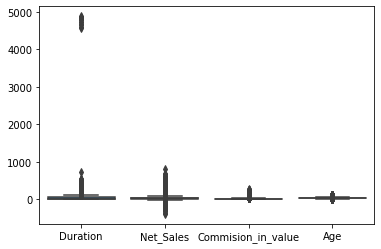

In [ ]:
bplot= sns.boxplot(data=travel_insurance) # DURATION에 매우 큰 이상치가 몰려있다. 

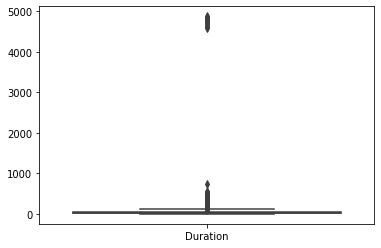

In [ ]:
bplot= sns.boxplot(data= travel_insurance[['Duration']])

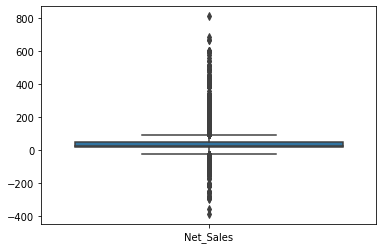

In [ ]:
bplot= sns.boxplot(data= travel_insurance[['Net_Sales']])

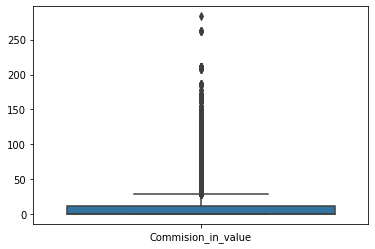

In [ ]:
bplot= sns.boxplot(data= travel_insurance[['Commision_in_value']])

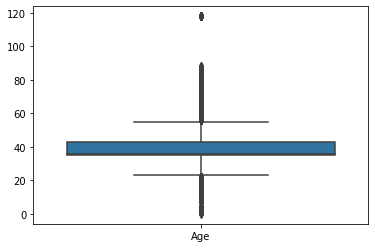

In [ ]:
bplot= sns.boxplot(data= travel_insurance[['Age']])

### 데이터에 이상치가 매우 많음을 알 수있음 
#### 그러나 보험금 데이터의 경우 이상치가 보험금 청구에 영향을 미칠 수 있으므로 그대로 진행 
#### 만약 성능이 안나온다면 이상치 제거 이후에 진행

In [13]:
import numpy as np

In [14]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    q25 = np.percentile(df[column].values, 25)
    q75 = np.percentile(df[column].values, 75)

    IQR = q75 - q25
    IQR_weight = IQR*weight

    lowest = q25 - IQR_weight
    highest = q75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    
    return outlier_idx

In [15]:
print(get_outlier)

<function get_outlier at 0x7f79db72a940>


# 2. 탐색적 자료분석 (EDA)

## 2-1 범주형

Text(0.5, 1.0, 'Gender')

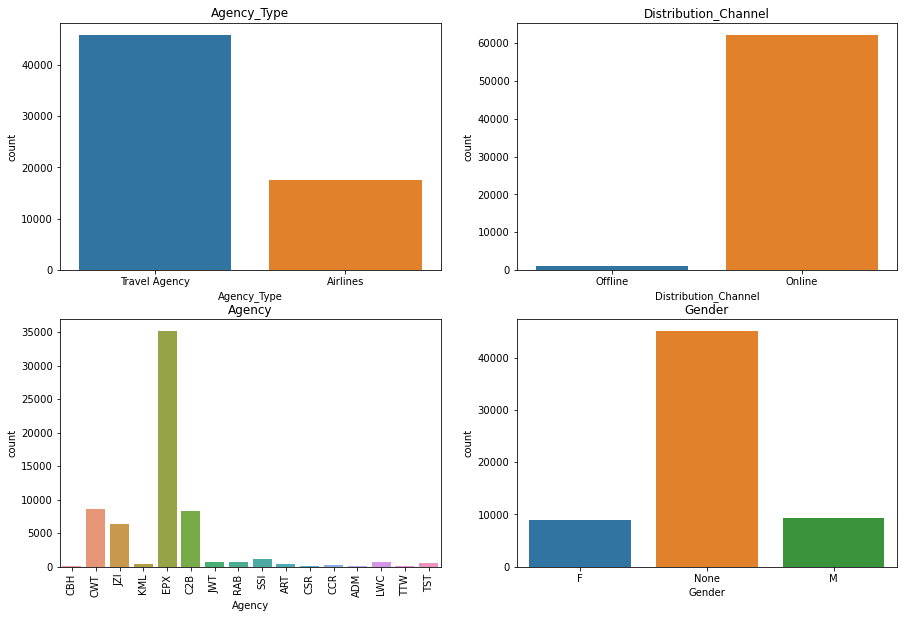

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(travel_insurance['Agency_Type'])
plt.title('Agency_Type')
plt.subplot(2,2,2)
sns.countplot(travel_insurance['Distribution_Channel'])
plt.title('Distribution_Channel')

plt.subplot(2,2,3)
sns.countplot(travel_insurance['Agency'])
plt.xticks(rotation=90)
plt.title('Agency')
plt.subplot(2,2,4)
sns.countplot(travel_insurance['Gender'])
plt.title('Gender')

Text(0.5, 1.0, 'Destination')

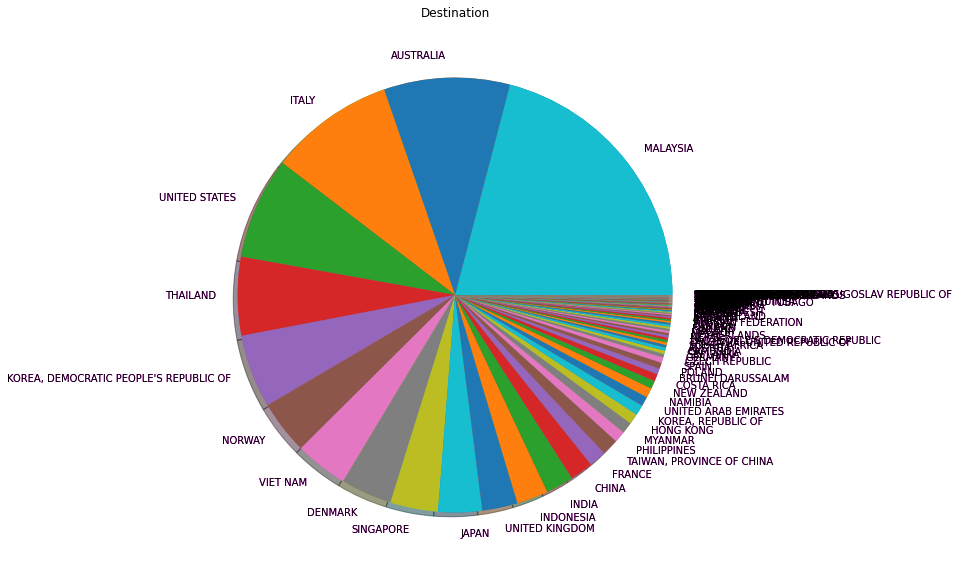

In [17]:
plt.figure(figsize=(15,10))

wedges, texts = plt.pie(travel_insurance['Destination'].value_counts(),    
                                  labels = travel_insurance['Destination'].unique(), 
                                  shadow = True,
                                  textprops = dict(color ="magenta")) 


plt.pie(travel_insurance['Destination'].value_counts(),labels=travel_insurance['Destination'].unique())
plt.title('Destination')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

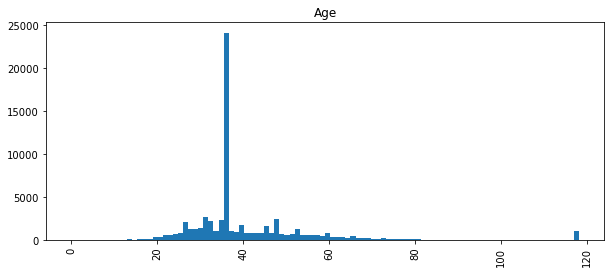

In [18]:
plt.figure(figsize = (10,4))
plt.hist(travel_insurance['Age'],bins=100)
plt.title('Age')
plt.xticks(rotation=90)

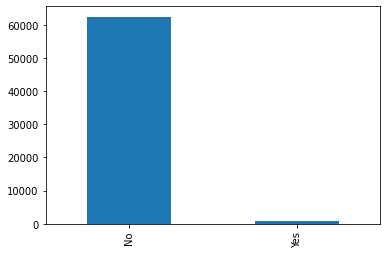

In [ ]:
# 종속변수 y 
travel_insurance['Claim'].value_counts().plot.bar()

# : 불균형이 상당히 심한 불균형 데이터 
## 1) 평가지표를 f1 score를 사용
## 2) 머신러닝 불균형 해소 방법인 SMOTE 이용

## 2-3. 연속형

In [19]:
travel_insurance.head(2)

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision_in_value,Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71


<AxesSubplot:xlabel='Duration', ylabel='Density'>

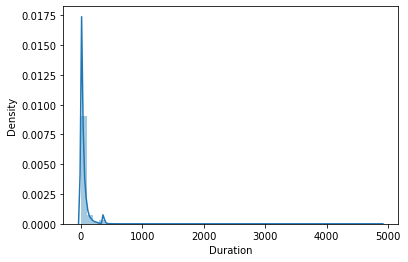

In [20]:
# 오른쪽으로 꼬리가 긴 분포를 띈다.
sns.distplot(travel_insurance['Duration'])

<AxesSubplot:xlabel='Commision_in_value', ylabel='Density'>

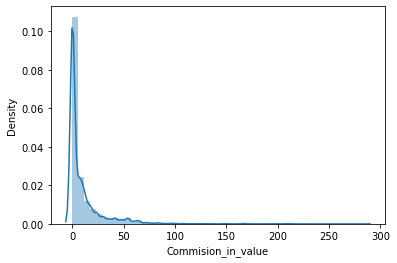

In [21]:
# 0인 경우가 대부분이다 
sns.distplot(travel_insurance['Commision_in_value'])

## 2-4. 연속형 독립변수 상관관계

In [22]:
corr = travel_insurance.corr(method = 'pearson') 
corr

,Duration,Net_Sales,Commision_in_value,Age
Duration,1.000000,0.429235,0.344772,0.002468
Net_Sales,0.429235,1.000000,0.651315,0.037756
Commision_in_value,0.344772,0.651315,1.000000,0.118348
Age,0.002468,0.037756,0.118348,1.000000


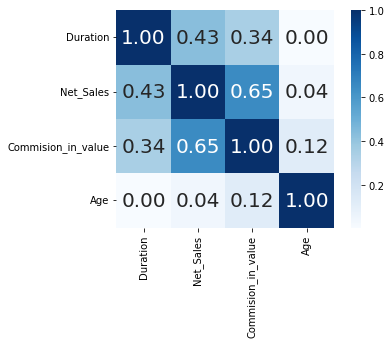

In [23]:
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 20}, fmt = '.2f', square = True, cmap = 'Blues')

# 3. 모델링
- 이진분류 모델링 : 로지스틱회귀, 랜덤포레스트, SVM
- 설명은 Notion 참조

## 3-1 불균형 해소
* 불균형 해소를 위해 SMOTE 기법을 이용한다

In [ ]:
# 일단 범주형 변수를 원핫인코딩 한다

In [24]:
from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()
travel_insurance['Agency']= label_encoder1.fit_transform(travel_insurance['Agency'])
  
label_encoder2 = preprocessing.LabelEncoder()
travel_insurance['Agency_Type']= label_encoder2.fit_transform(travel_insurance['Agency_Type'])

label_encoder3 = preprocessing.LabelEncoder()
travel_insurance['Distribution_Channel']= label_encoder3.fit_transform(travel_insurance['Distribution_Channel'])

label_encoder4 = preprocessing.LabelEncoder()
travel_insurance['Product_Name']= label_encoder4.fit_transform(travel_insurance['Product_Name'])

label_encoder5 = preprocessing.LabelEncoder()
travel_insurance['Claim']= label_encoder5.fit_transform(travel_insurance['Claim'])

label_encoder6 = preprocessing.LabelEncoder()
travel_insurance['Destination']= label_encoder6.fit_transform(travel_insurance['Destination'])

In [25]:
column_names = ["Agency", "Agency_Type", "Distribution_Channel","Product_Name","Duration","Destination","Net_Sales","Commision_in_value","Age","Claim"]
travel_insurance = travel_insurance.reindex(columns=column_names)

In [26]:
y= travel_insurance.iloc[:,[-1]]
X= travel_insurance.drop(y.columns,axis = 1)

In [28]:
X

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision_in_value,Age
0,3,1,0,12,186,79,-29.0,9.57,81
1,3,1,0,12,186,79,-29.0,9.57,71
2,6,1,1,16,65,4,-49.5,29.70,32
3,6,1,1,16,60,4,-39.6,23.76,32
4,6,1,1,16,79,61,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...
63321,9,0,1,8,111,63,35.0,12.25,31
63322,9,0,1,8,58,26,40.0,14.00,40
63323,9,0,1,8,2,79,18.0,6.30,57
63324,9,0,1,8,3,145,18.0,6.30,63


In [36]:
!pip install -U imbalanced-learn

In [39]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')
print('\nBalance of positive and negative classes (%):')
y_sm = pd.DataFrame(y_sm)
X_sm = pd.DataFrame(X_sm) 
y_sm.value_counts(normalize=True)*100
# y_sm.value_counts(normalize=True) * 100

AttributeError: module 'sklearn.utils._openmp_helpers' has no attribute '__pyx_capi__'

In [35]:
X_sm.columns

NameError: name 'X_sm' is not defined

In [ ]:
from sklearn.model_selection import train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.35, random_state=40)

#### 1) 로지스틱 회귀

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict = clf.predict(X_test)

In [ ]:
clf.score(X_train, y_train)

0.7657363347222564

In [ ]:
clf.score(X_test, y_test)

0.7643543956043956

Accuracy = 0.76
Recall = 0.68



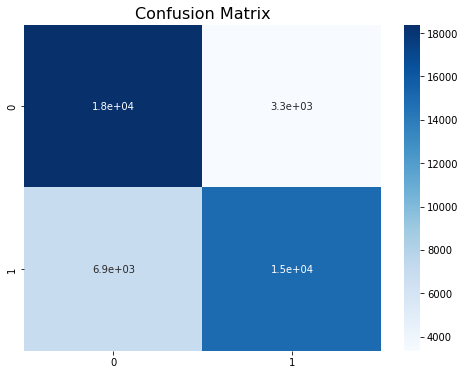

In [ ]:
print(f'Accuracy = {accuracy_score(y_test, y_predict):.2f}\nRecall = {recall_score(y_test, y_predict):.2f}\n')
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
# f1 score가 79%로 매우 높음 -> 분류를 매우 잘함을 알 수 있다. 
f1_score(y_test, y_predict, average='macro')

0.7629204923480837

In [ ]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf, X_train, y_train, cv=10)

In [ ]:
cv_results['test_score']

array([0.75456114, 0.76565582, 0.76923077, 0.76442308, 0.76627219,
       0.76577909, 0.76084813, 0.77157298, 0.7647639 , 0.77302429])

## 2)랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf.score(X_train, y_train)

0.9944895091101852

In [ ]:
rf.score(X_test, y_test)

0.9703754578754579

In [ ]:
y_predict = rf.predict(X_test)

Accuracy = 0.97
Recall = 0.98



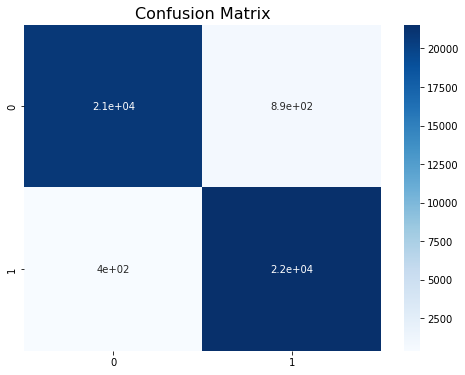

In [ ]:
print(f'Accuracy = {accuracy_score(y_test, y_predict):.2f}\nRecall = {recall_score(y_test, y_predict):.2f}\n')
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
# f1 score가 97%로 매우 높음 -> 분류를 매우 잘함을 알 수 있다. 
f1_score(y_test, y_predict, average='macro')

0.9703678477114293

# 랜덤포레스트가 f1 score 97%로 가장 좋은 성능을 보임을 알 수 있다